# Number of phenotypes explained by the number of transcriptomes and the cost of transcription:

---

## loading required libraries:

In [2]:
library("jtools")
library("MASS")
library("interactions")
library("tidyverse")


Attaching package: ‘interactions’


The following objects are masked from ‘package:jtools’:

    cat_plot, interact_plot, johnson_neyman, probe_interaction,
    sim_slopes


Registered S3 methods overwritten by 'broom':
  method            from  
  tidy.glht         jtools
  tidy.summary.glht jtools

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.6
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()



## loading working database from file:

In [4]:
working.db <- read_csv("File_S1.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  org_id = col_double(),
  phen_id = col_double(),
  trans_id = col_double(),
  n_env = col_double(),
  trans_length = col_double(),
  fitness = col_double(),
  equ = col_double(),
  xor = col_double(),
  nor = col_double(),
  andn = col_double(),
  or = col_double(),
  orn = col_double(),
  and = col_double(),
  nand = col_double(),
  not = col_double()
)




## getting data:

In [5]:
db <- working.db %>%
    group_by(org_id) %>%
    summarise(n_phen = n_distinct(phen_id), n_trans = n_distinct(trans_id), n_env = sum(n_env), .groups = 'drop') %>%
    filter(n_phen > 1 & n_trans > 1) %>%
    mutate(sc.log.n_trans = scale(log(n_trans)), cost = ifelse(n_env <1000, 1, 0))

## showing some data:

In [6]:
db %>% head
db %>% filter(cost == 0) %>% nrow
db %>% filter(cost == 1) %>% nrow
db %>% nrow
(db %>% filter(cost == 0) %>% nrow)/(db %>% nrow)*100

org_id n_phen n_trans n_env sc.log.n_trans cost
1 1009   4       63       64   0.3764251     1   
2 1040   2       45     1000   0.1642979     0   
3 1043   2       25       26  -0.2062693     1   
4 1047   2      445     1000   1.6089070     0   
5 1048   4      161      279   0.9679525     1   
6 1050   3       61       63   0.3560864     1

[1] 17744

[1] 62589

[1] 80333

[1] 22.08806

## zero-truncated negative binomial regression model (Table 2, middle):

In [7]:
m <- glm.nb(n_phen ~ sc.log.n_trans * cost,
            data = db) # MASS library
summ(m, robust = "HC1", scale = FALSE, confint = TRUE, digits = 3, pvals = FALSE, exp = FALSE)

MODEL INFO:
Observations: 80333
Dependent Variable: n_phen
Type: Generalized linear model
  Family: Negative Binomial(2.5269) 
  Link function: log 

MODEL FIT:
χ²() = , p = 
Pseudo-R² (Cragg-Uhler) = 0.123
Pseudo-R² (McFadden) = 0.023
AIC = 443213.017, BIC = 443259.487 

Standard errors: Robust, type = HC1
--------------------------------------------------------------
                              Est.     2.5%    97.5%    z val.
------------------------- -------- -------- -------- ---------
(Intercept)                  2.150    2.123    2.176   159.984
sc.log.n_trans              -0.044   -0.060   -0.028    -5.483
cost                        -0.559   -0.587   -0.531   -38.964
sc.log.n_trans:cost          0.326    0.304    0.349    28.753
--------------------------------------------------------------

## plotting (Fig 3):

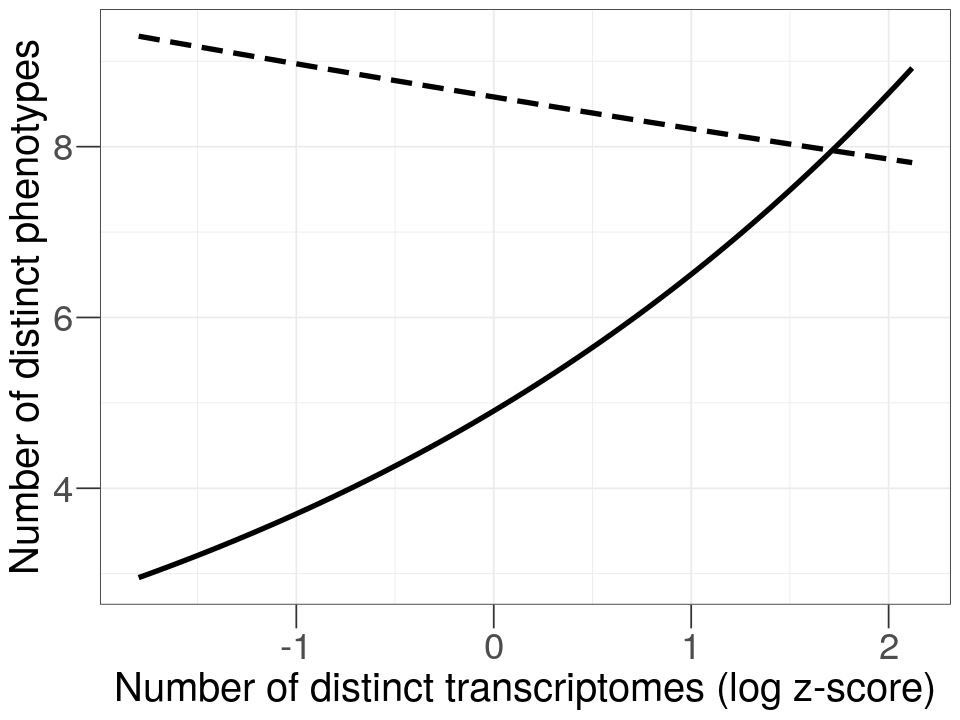

In [8]:
options(repr.plot.width = 8, repr.plot.height = 6)
# plot interactions in regression models
interact_plot(m, pred = sc.log.n_trans, modx = cost, plot.points = FALSE,
              x.label = "Number of distinct transcriptomes (log z-score)",
              y.label = "Number of distinct phenotypes",
              line.thickness = 1.5,
              colors = c("black", "black")) +
theme_bw() +
theme(axis.title = element_text(size = 24),
      axis.text = element_text(size = 22),
      axis.ticks.length = unit(0.5, "cm"),
      legend.position = "none")

---